In [3]:
strand_per_base = {"A" : {"F" : 0, "R" : 0},  "T" : {"F" : 0, "R" : 0}, "C" : {"F" : 0, "R" : 0}, "G" : {"F" : 0, "R" : 0}, "Ins" : {"F" : 0, "R" : 0}, "Del" : {"F" : 0, "R" : 0}}

strand_per_base["A"]["F"]

0

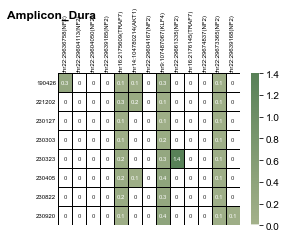

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams["font.family"] = 'arial'
title = "Amplicon_Dura"

vaf_df = pd.read_csv ( "/data/project/Meningioma/51.Amplicon/02.multiplex/07.pysam/Dura_vaf_df.tsv", sep = "\t", index_col = 0)

vaf_df = vaf_df * 100
vaf_df = vaf_df.round(1)

# Define the colors
colors = [ "white", "#A3B18A", "#588157"]
positions = [0, 0.01, 1]  # Define the positions for each color
# Create the colormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, colors)))

fig, ax = plt.subplots ( nrows = 1, ncols = 1, figsize =(10 / 2.54, 8 / 2.54))

fig.subplots_adjust ( wspace = 0.4, bottom = 0.03, top = 0.7, left = 0.18, right = 0.98)
fig.set_facecolor('white')

sns.heatmap (vaf_df , cmap = cmap, linewidths = 0.5, linecolor = "black", annot = vaf_df, annot_kws={"size": 6 } )   # fmt=".2f", 
fig.suptitle ( title, fontsize = 12, fontweight = "bold", ha = "left", x = 0 )
ax.set_xticklabels( ax.get_xticklabels(), fontsize = 5, ha = 'center' )
ax.tick_params(axis = 'x',  rotation = 90, pad = -2.5)
ax.set_yticklabels( [ i.get_text().replace( "_Multiplex.sorted" , "" ) for i in ax.get_yticklabels()], fontsize = 5, va = 'center' )
ax.tick_params(axis = 'y', pad = -1.5 )

plt.tick_params(axis='both', which='major', labelsize = 6, left = False, labelbottom = False, bottom=False, top = False, labeltop=True)

fig.savefig ( "/data/project/Meningioma/51.Amplicon/02.multiplex/07.pysam/Dura_heatmap.pdf", dpi = 300)


In [104]:
vaf_df

,chr22:29636758(NF2),chr22:29604113(NF2),chr22:29604050(NF2),chr22:29639185(NF2),chr16:2175609(TRAF7),chr14:104780214(AKT1),chr22:29604167(NF2),chr9:107487067(KLF4),chr22:29661335(NF2),chr16:2176145(TRAF7),chr22:29674837(NF2),chr22:29673365(NF2),chr22:29639168(NF2)
190426_Multiplex.sorted,0.003,0.0,0.0,0.0,0.001,0.001,0.0,0.003,0.0,0.0,0.0,0.001,0.0
230303_Multiplex.sorted,0.000,0.0,0.0,0.0,0.001,0.000,0.0,0.002,0.0,0.0,0.0,0.001,0.0
230405_Multiplex.sorted,0.000,0.0,0.0,0.0,0.002,0.001,0.0,0.004,0.0,0.0,0.0,0.001,0.0


## 230323-Dura의 vaf distribution

<ipython-input-48-e713989c4be6>:21: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde_function = kde.gaussian_kde( vaf_list )


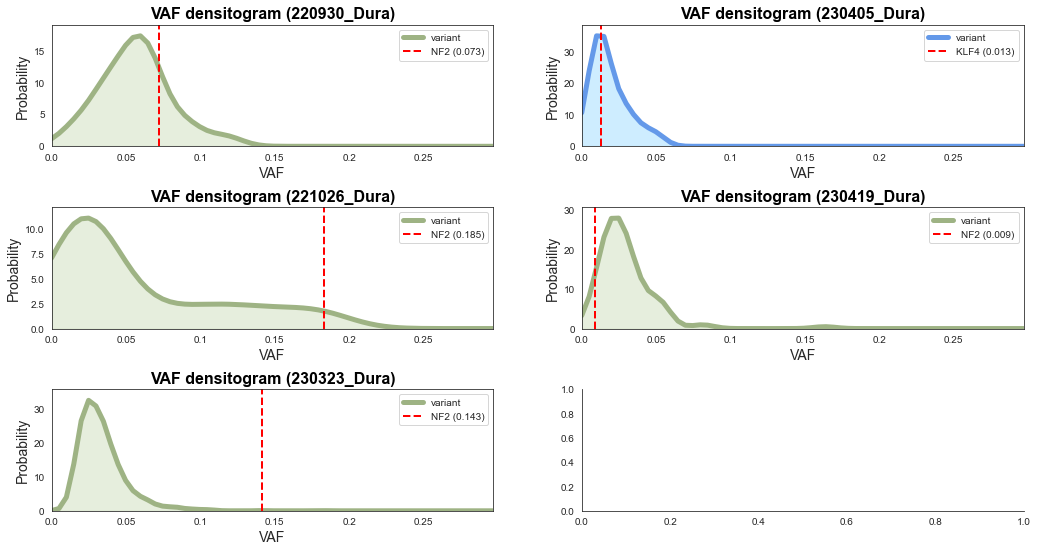

In [48]:
def drawfigure (vaf_list, vaf_dict, ax, label, pal, gene):
    import matplotlib 
    matplotlib.rcParams["font.family"] = 'arial'
    import palettable
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import kde

    tabl = palettable.tableau.Tableau_20.mpl_colors
    safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
    Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

    colorlist = [i for i in safe7]
    sns.set_style("white")
    #sns.set_palette("tab10")
    sns.set_palette(sns.color_palette(colorlist))

    ax.set_title ( "VAF densitogram ({})".format(label), fontsize = 16, fontweight='bold', color='black')

    x = np.linspace(0, 1, 200)
    kde_function = kde.gaussian_kde( vaf_list )
    y = kde_function(x) 

    ax.plot (x, y, label = "variant", linewidth = 5, color = pal[0])
    ax.fill_between(x, y, color = pal[1], alpha=0.5)   

    # median & mean
    ax.axvline(x = vaf_dict[ gene ],  ymin = 0, ymax = np.max(y) , label = "{} ({})".format ( gene, round ( vaf_dict[ gene ], 3) ), linestyle='--', linewidth=2, color = 'red' ) 

    # 축 설정
    ax.set_xticks (  np.linspace (0, 1.01, 21) )
    ax.set_xticklabels (  np.round ( np.linspace (0, 1.01, 21), 2 ) )
    ax.set_xlabel("VAF", fontdict = {"fontsize" : 14})
    ax.set_ylabel("Probability", fontdict = {"fontsize" : 14})
    ax.axis ( [0, 0.3, 0, np.max (y) * 1.1] )

    # Spine 설정
    fig.gca().spines['top'].set_visible(False)
    fig.gca().spines['right'].set_visible(False)
    ax.legend()    


def make_vaflist (INPUT_VCF):
    import vcf
    vcf_reader = vcf.Reader(open(INPUT_VCF, "r"))

    vaf_list, vaf_dict = [], {}
    for i, record in enumerate( vcf_reader) :        # record.CHROM, recrod.POS ,record.ALT
        #print (record.samples [1].data.AF[0], record.INFO["CSQ"][0].split("|")[3] )
        vaf_list.append ( record.samples [1].data.AF[0] )
        vaf_dict [ record.INFO["CSQ"][0].split("|")[3] ] = record.samples [1].data.AF[0]

    return vaf_list, vaf_dict




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde



fig, ax = plt.subplots(ncols=2, nrows = 3, figsize=(15, 9))
fig.subplots_adjust ( hspace = 0.5, bottom = 0.15, top = 0.9, left = 0.08, right = 0.98)

# 220930_Dura
vaf_list, vaf_dict = make_vaflist ( "/data/project/Meningioma/04.mutect/04.rescue/220930_Dura.MT2.FMC.HF.RMBLACK.vep.rescue.vcf" )
drawfigure ( vaf_list, vaf_dict, ax[0, 0], "220930_Dura", ["#9EB384", "#CEDEBD"], "NF2")

# 221026_Dura
vaf_list, vaf_dict = make_vaflist ( "/data/project/Meningioma/04.mutect/04.rescue/221026_Dura.MT2.FMC.HF.RMBLACK.vep.rescue.vcf" )
drawfigure ( vaf_list, vaf_dict, ax[1, 0], "221026_Dura", ["#9EB384", "#CEDEBD"], "NF2" )


# 230323_Dura
vaf_list, vaf_dict = make_vaflist ( "/data/project/Meningioma/04.mutect/04.rescue/230323_Dura.MT2.FMC.HF.RMBLACK.vep.rescue.vcf" )
drawfigure ( vaf_list, vaf_dict, ax[2, 0], "230323_Dura", ["#9EB384", "#CEDEBD"], "NF2")

# 230405_Dura
vaf_list, vaf_dict = make_vaflist ( "/data/project/Meningioma/04.mutect/04.rescue/230405_Dura.MT2.FMC.HF.RMBLACK.vep.rescue.vcf" )
drawfigure ( vaf_list, vaf_dict, ax[0, 1], "230405_Dura", ["#6499E9", "#9EDDFF"], "KLF4" )

# 230419_Dura
vaf_list, vaf_dict = make_vaflist ( "/data/project/Meningioma/04.mutect/04.rescue/230419_Dura.MT2.FMC.HF.RMBLACK.vep.rescue.vcf" )
drawfigure ( vaf_list, vaf_dict, ax[1, 1], "230419_Dura", ["#9EB384", "#CEDEBD"], "NF2")


#sns.kdeplot (pd.DataFrame(vaf_list), linewidth = 3, ax = ax)


